## Monte Carlo integration

In [13]:
import numpy as np
import secrets
import matplotlib.pyplot as plt

### Solve the integral $\large \int_0^2 \sin^2 \left[ \frac{1}{x(2-x)} \right] dx$, both via "simple" MC integration and using the mean value method

##### Defining and plotting the function to integrate

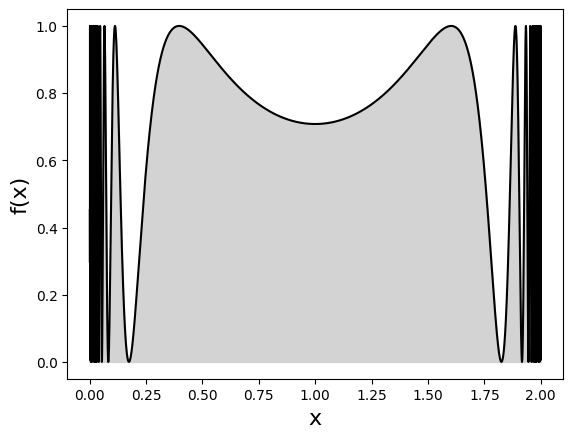

In [14]:
def f(x): return (np.sin(1/(x*(2.0-x))))**2

x = np.arange(0.001,2,0.0001)
y = f(x)
plt.plot(x,y,color='black')
plt.fill_between(x,y, color='lightgray')
plt.xlabel('x',size = 16)
plt.ylabel('f(x)', size = 16)
plt.show()

##### 1) Integrating via "simple Monte Carlo"

In [15]:
# Monte Carlo integration of function f, using N points
def MCint(f,N):
    seed = secrets.randbits(128)
    rng = np.random.default_rng(seed)
    # List with x-coordinate of random generated points in the rectangle [0,2]x[0,1]
    x = 2. *rng.random(N)
    # List of f(x) values, for all random generated x
    fx = f(x)
    # List of random generated y-coordinates
    y = rng.random(N)
    # Count the number of points for which y < f(x) (i.e. falling in gray-shaded area in the plot above)
    k = np.sum(np.array(fx - y) > 0.)
    # Calculate integral as (A k /N), where A i the area of the rectangle
    A = 2.
    return A*k/float(N)

# Result as a function of the number of points used for integration
Npoints = [10**x for x in range(2,7)]
for N in Npoints:
    I = MCint(f,N)
    print("N =", ("{:<7}".format(str(N))), ", I =", ("{:.6f}".format(I)) )

N = 100     , I = 1.520000
N = 1000    , I = 1.392000
N = 10000   , I = 1.449400
N = 100000  , I = 1.450120
N = 1000000 , I = 1.450726


##### 2) Integrating via mean value method

In [16]:
# Monte Carlo integration of function f, using N points and the mean value method
def MCint_mean(f,N,a,b):
    seed = secrets.randbits(128)
    rng = np.random.default_rng(seed)
    # List with x-coordinate of random generated points in the interval [a,b]
    x = (b-a)*rng.random(N)
    # List of f(x) values in the random generated x
    fx = np.array(f(x))
    # Calculate integral as [(b-a)/N]*sum(fx)
    return (b-a)*np.sum(fx)/float(N)

a=0. 
b=2.
Npoints = [10**x for x in range(2,7)]
for N in Npoints:
    I = MCint_mean(f,N,a,b)
    print("N =", ("{:<7}".format(str(N))), ", I =", ("{:.6f}".format(I)) )

N = 100     , I = 1.557244
N = 1000    , I = 1.473392
N = 10000   , I = 1.448979
N = 100000  , I = 1.449808
N = 1000000 , I = 1.451680


### Solve the integral $\large \int_0^1 \frac{x^{-1/2}}{e^x  + 1} dx$, via importance sampling

##### 1) We choose weights as $w(x) = x^{-1/2}$. First of all, we see that this requires sampling from $\large p(x) = \frac{1}{2 x^{1/2}}$ (check it) and we implement the transformation formula to do that (derive it).   

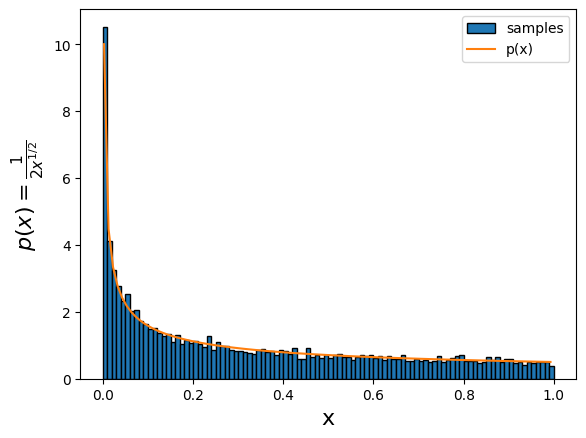

In [17]:
seed = secrets.randbits(128)
rng = np.random.default_rng(seed)
N = 10000
x = rng.random(N)
# Transformation to get r.v. distributed as p(x) = (x^-0.5)/2
x = x**2

# Plotting histogram of sampled values and checking that they are distributed as p(x)
plt.hist(x, bins=100, density=True, ec = 'black', histtype='bar',label='samples')
xlist = np.arange(0.0025,1.,0.01)
px = 1./(2.*np.sqrt(xlist))
plt.plot(xlist,px, label='p(x)')
plt.xlabel('x',size=16)
plt.ylabel(r'$p(x)=\frac{1}{2x^{1/2}}$',size = 16)
plt.legend()
plt.show()

##### 2) We compute the integral with importance sampling, $\large I = \frac{1}{N} \sum \frac{f(x_i)}{w(x_i)} \int_a^b w(x)dx$ and use $w(x) = x^{-1/2}$ (See box above).

In [18]:
# Integrand function
def f(x): return x**(-0.5)/(np.exp(x)+1)

# Number of points in the sample
N = 1000000

# Sampling x_i: r.v. distributed as p(x) (see above)
x = rng.random(N)
x = np.array(x**2)

# Calculating (w(x_i)), for all sampled points
w = x**(-0.5)
# Calculating f(x_i), for all sampled points
fx = f(x)

# Implementing importance sampling formula with a=0, b=1 and noting that \int w(x)dx = 2
I = (2./float(N))*np.sum(fx/w)

print('I = ', I)

I =  0.8388913172119957
